In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: >

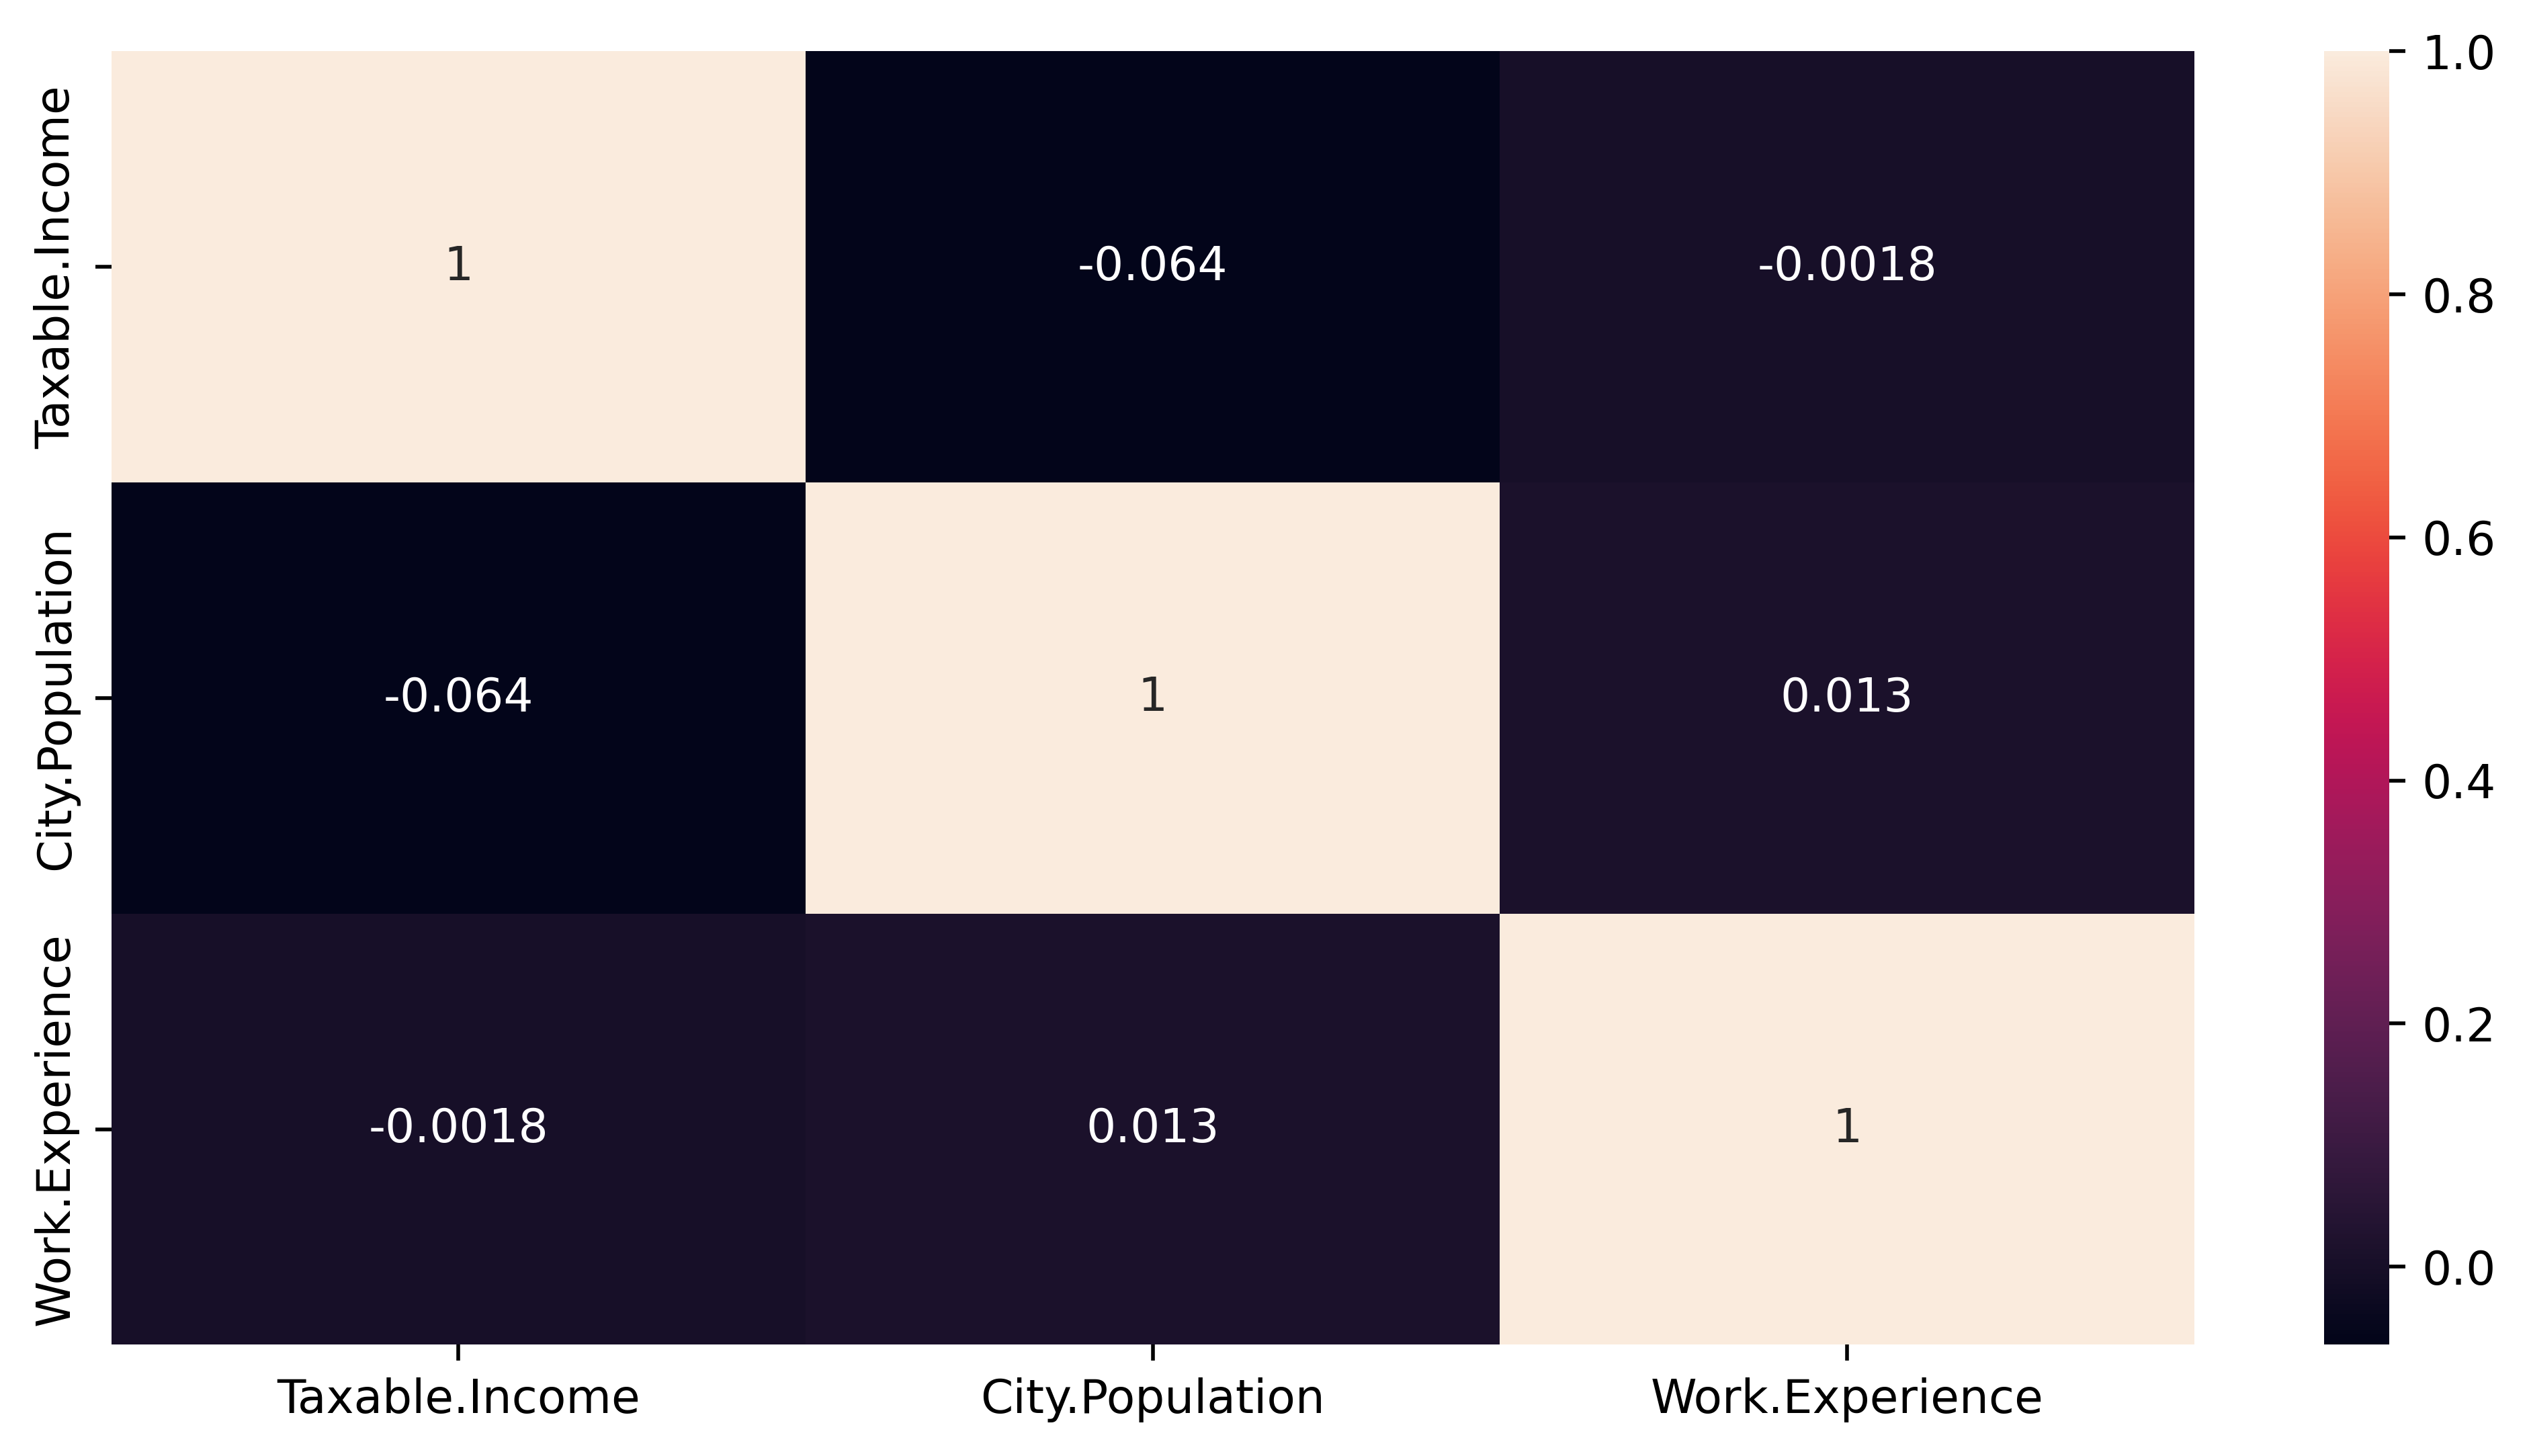

In [7]:
sns.heatmap(df.corr(), annot = True)

In [8]:
LE = LabelEncoder()
df['Marital.Status']= LE.fit_transform(df['Marital.Status'])
df['Undergrad']= LE.fit_transform(df['Undergrad'])
df['Urban']= LE.fit_transform(df['Urban'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
#taxable income is <=30000 means Risky(0) otherwise Good(1)
df['Taxable.Income']=[0 if i<=30000 else 1 for i in df['Taxable.Income']]
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [10]:
data=df[['Taxable.Income','City.Population','Work.Experience','Undergrad','Marital.Status','Urban']]
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,1,50047,10,0,2,1
1,1,134075,18,1,0,1
2,1,160205,30,0,1,1
3,1,193264,15,1,2,1
4,1,27533,28,0,1,0


In [11]:
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data)

IsolationForest(contamination=0.01, random_state=10)

In [12]:
#predictions
y_pred_outliers = clf.predict(data)
y_pred_outliers  

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [13]:
data['Outliers']=y_pred_outliers
data

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,Outliers
0,1,50047,10,0,2,1,1
1,1,134075,18,1,0,1,1
2,1,160205,30,0,1,1,1
3,1,193264,15,1,2,1,1
4,1,27533,28,0,1,0,1
...,...,...,...,...,...,...,...
595,1,39492,7,1,0,1,1
596,1,55369,2,1,0,1,1
597,1,154058,0,0,0,1,1
598,1,180083,17,1,1,0,1


In [14]:
 # outlier Data points
data[data.Outliers==-1]

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,Outliers
16,0,34551,29,1,0,0,-1
34,0,183767,1,1,0,1,-1
126,0,195022,3,1,0,1,-1
168,0,167629,30,0,0,0,-1
280,0,33184,1,0,0,0,-1
541,0,191874,30,1,0,1,-1


In [15]:
data1= data.drop(data.index[[16,34,126,168,280,541]],axis=0).reset_index()
data1

,index,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,Outliers
0,0,1,50047,10,0,2,1,1
1,1,1,134075,18,1,0,1,1
2,2,1,160205,30,0,1,1,1
3,3,1,193264,15,1,2,1,1
4,4,1,27533,28,0,1,0,1
...,...,...,...,...,...,...,...,...
589,595,1,39492,7,1,0,1,1
590,596,1,55369,2,1,0,1,1
591,597,1,154058,0,0,0,1,1
592,598,1,180083,17,1,1,0,1


In [16]:
#remove extra columns
data1=data1.drop(['Outliers','index'],axis=1)

---------------
* splitting into features & target

In [17]:
x=data1.iloc[:,1:]
y=data1.iloc[:,0]

In [18]:
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.75, random_state=143)

In [19]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt.fit(x_train,y_train)
ypred = dt.predict(x_test)

In [20]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.32      0.18      0.23        33
           1       0.79      0.89      0.84       116

    accuracy                           0.73       149
   macro avg       0.55      0.53      0.53       149
weighted avg       0.69      0.73      0.70       149



In [21]:
dt.score(x_test, y_test)

0.7315436241610739

In [22]:
#by using gini
dt1= DecisionTreeClassifier(criterion='gini',max_depth=9)

In [23]:
dt1.fit(x_train,y_train)
ypred1 = dt1.predict(x_test)

In [24]:
print(classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       0.22      0.21      0.22        33
           1       0.78      0.78      0.78       116

    accuracy                           0.66       149
   macro avg       0.50      0.50      0.50       149
weighted avg       0.65      0.66      0.66       149



------------
* grid search cv

In [25]:
param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(3, 150)}]
model = DecisionTreeClassifier()
estimator = model

clf = GridSearchCV(estimator,param, cv=10)
clf.fit(x,y)

print(clf.best_score_)
print(clf.best_params_)

0.7996327683615819
{'criterion': 'gini', 'max_depth': 3}


In [26]:
param1 = [{'min_samples_split':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150],'min_samples_leaf':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150]}]
clf2= GridSearchCV(estimator,param1, cv=10)
clf2.fit(x,y)
print(clf2.best_score_)
print(clf2.best_params_)

0.8014124293785312
{'min_samples_leaf': 12, 'min_samples_split': 120}


In [27]:
clf.best_params_,clf2.best_params_

({'criterion': 'gini', 'max_depth': 3},
 {'min_samples_leaf': 12, 'min_samples_split': 120})

In [28]:
#fitting model on this data
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3,min_samples_leaf=11,min_samples_split=120)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=11, min_samples_split=120)

In [29]:
pred_cv = model.predict(x_test) 

In [30]:
print(classification_report(y_test,pred_cv))

              precision    recall  f1-score   support

           0       0.33      0.03      0.06        33
           1       0.78      0.98      0.87       116

    accuracy                           0.77       149
   macro avg       0.56      0.51      0.46       149
weighted avg       0.68      0.77      0.69       149



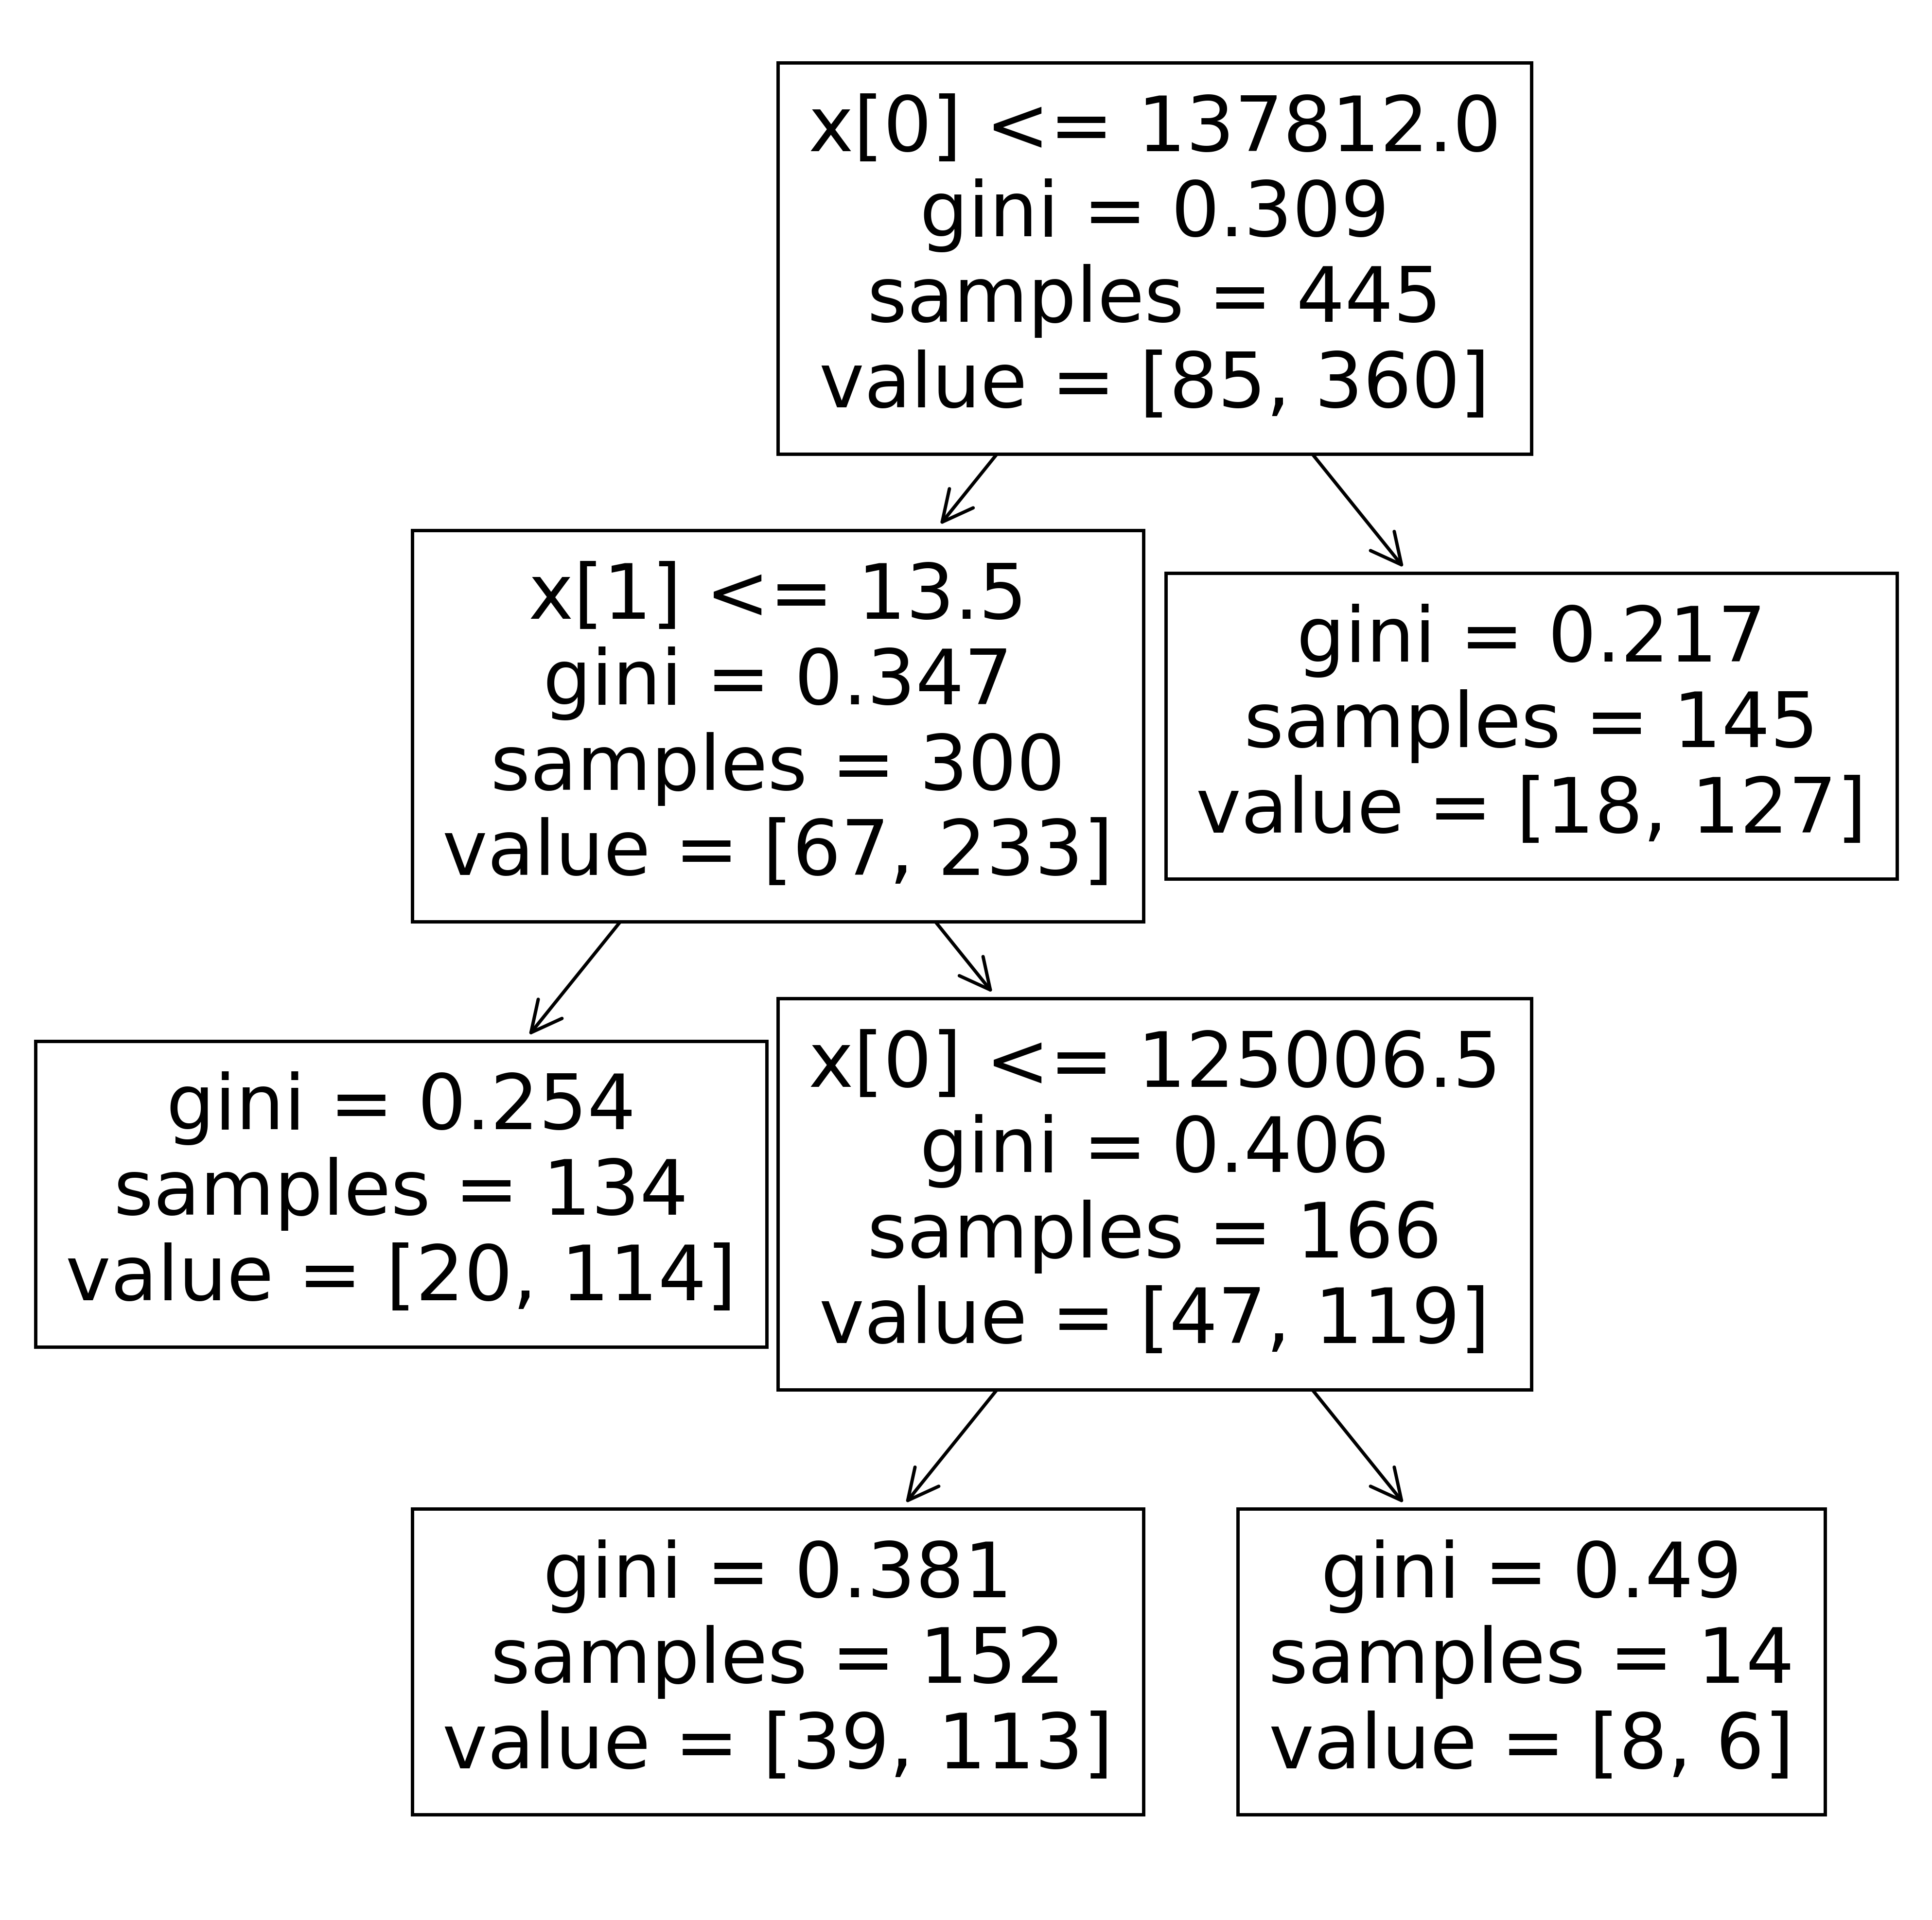

In [31]:
plt.figure(figsize=(10,10))
model_L = DecisionTreeClassifier(criterion = 'gini',max_depth=3,min_samples_leaf=11,min_samples_split=150)
tree.plot_tree(model_L.fit(x_train,y_train));